In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
employee_df = pd.read_excel('../data/HR_Employee_Data1.xlsx')
employee_df.head()

,Unnamed: 0,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


After analyzing the results from the first linear regression try, we will be trying another approach.

In [3]:
employee_df = employee_df.drop(['Unnamed: 0'], axis=1)

In [4]:
employee_df['salary'] = employee_df['salary'].replace({'low':1, 'medium':2, 'high':3})

In [5]:
employee_df['department'].value_counts(dropna=False)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [6]:
department_lble = LabelEncoder()
employee_df['department_labels'] = department_lble.fit_transform(employee_df['department'])
employee_df.head()

,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,department_labels
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,1,7
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,2,7
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,2,7
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,1,7
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,1,7


Dropping categorical columns

In [7]:
employee_df = employee_df.drop(['emp_id'], axis=1)

In [8]:
employee_df = employee_df.drop(['department'], axis=1)

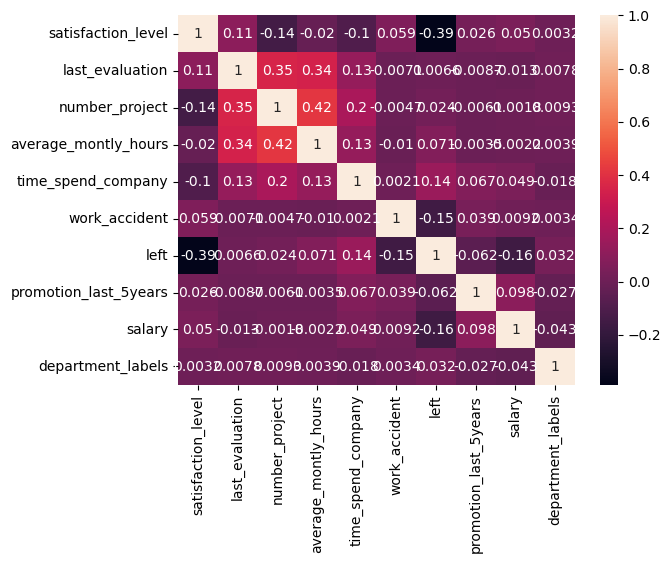

In [9]:
correlations_matrix = employee_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [10]:
employee_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'salary', 'department_labels'],
      dtype='object')

Dropping 3 more columns, that could be considered more correlated, crosschecking the heatmap and some of the plots on the jupyter notebook called plots: 

In [11]:
employee_df = employee_df.drop(['last_evaluation'], axis=1)
employee_df = employee_df.drop(['number_project'], axis=1)
employee_df = employee_df.drop(['time_spend_company'], axis=1)

Now applying ours scaler:

In [13]:
X = employee_df.drop(['left'], axis=1)#since the column left is the one we want to predict
y = employee_df['left']

In [14]:
scaler = MinMaxScaler()
X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled_df

,satisfaction_level,average_montly_hours,work_accident,promotion_last_5years,salary,department_labels
0,0.318681,0.285047,0.0,0.0,0.0,0.777778
1,0.780220,0.775701,0.0,0.0,0.5,0.777778
2,0.021978,0.822430,0.0,0.0,0.5,0.777778
3,0.692308,0.593458,0.0,0.0,0.0,0.777778
4,0.307692,0.294393,0.0,0.0,0.0,0.777778
...,...,...,...,...,...,...
14994,0.340659,0.257009,0.0,0.0,0.0,0.888889
14995,0.307692,0.299065,0.0,0.0,0.0,0.888889
14996,0.307692,0.219626,0.0,0.0,0.0,0.888889
14997,0.021978,0.859813,0.0,0.0,0.0,0.888889


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size = 0.3, random_state=66)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10499, 6)
(4500, 6)
(10499,)
(4500,)


Applying our regression model:

In [16]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred_train = lm.predict(X_train)
r2_score(y_train,y_pred_train)

0.19119019615959176

In [19]:
y_pred_test = lm.predict(X_test)
r2_score(y_test,y_pred_test)

0.196451905330993